### Introducción

En un centro meteorológico, se contratan sus servicios como Data Scientist para construir un modelo que prediga si lloverá o no en las próximas 24 horas, utilizando información de las 24 horas previas. Se dispone de un conjunto de 19 variables meteorológicas. La descripción de las variables es la siguiente:


* **MinTemp** Temperatura mínima registrada.
* **MaxTemp** Temperatura máxima registrada.
* **Lluvia** Cantidad de lluvia registrada ese día en mm.
* **Evaporacion** Evaporación (mm) en 24 horas.
* **Sol** Número de horas de sol brillante en el día.
* **VelRafaga** La velocidad (km/h) de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche.
* **Vel9am** La velocidad (km/h) de la ráfaga de viento a las 9am.
* **Vel3pm** La velocidad (km/h) de la ráfaga de viento a las 9am.
* **Hum9am** Porcentaje de humedad a las 9am.
* **Hum3pm** Porcentaje de humedad a las 3pm.
* **Pres9am** Presión atmosférica (hpa) a nivel del mar a las 9am.
* **Pre3pm** Presión atmosférica (hpa) a nivel del mar a las 3pm.
* **Nub9am** Fracción del cielo cubierto por nubes a las 9am. Se mide en “octavos”, de manera que un valor 0 indica cielo. totalmente despejado y 8, cielo totalmente cubierto.
* **Nub3pm** Fracción del cielo cubierto por nubes a las 3pm. Se mide en “octavos”, de manera que un valor 0 indica cielo. totalmente despejado y 8, cielo totalmente cubierto.
* **Temp9am** Temperatura en grados celsius a las 9am.
* **Temp3pm** Temperatura en grados celsius a las 3pm.
* **LluviaHoy** Variable indicadora que toma el valor 1 si la precipitación en mm. en las últimas 24 horas. excede 1 mm. y 0, si no.
* **Koppen** Clasificación Koppen de la zona de medición (Temperate, Subtropical, Grassland, Tropical, Desert).
* **Estación** Estación del Año.
* **LluviaMan** Indicador de lluvia al día siguiente de la medición.

## Parte 1

Cargue la base de datos Lluvia_full.csv, codifique la variable LluviaMan como 0 y 1 para los días sin lluvia y con lluvia respectivamente. Además, realice una separación de la base de datos en un set de entrenamiento y set de validación. Utilice una proporción de 70:30 respectivamente estratificado por la LluviaMan. Para poder replicar sus resultados, fije una semilla antes de obtener los indices. Para ello utilice la función set.seed(2023).

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split

# Configuración de los gráficos
plt.style.use("ggplot")
%config InlineBackend.figure_format = "retina"

import warnings
warnings.filterwarnings('ignore')

In [3]:
DF = pd.read_csv("Lluvia_full (1).csv")
DF.head()

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,No,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,No,No,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,No,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,Yes,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,No,Temperate,Invierno


In [4]:
DF.isnull().sum()

MinTemp        0
MaxTemp        0
Lluvia         0
Evaporacion    0
Sol            0
VelRafaga      0
Vel9am         0
Vel3pm         0
Hum9am         0
Hum3pm         0
Pres9am        0
Pre3pm         0
Nub9am         0
Nub3pm         0
Temp9am        0
Temp3pm        0
LluviaHoy      0
LluviaMan      0
Koppen         0
Estacion       0
dtype: int64

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      56420 non-null  float64
 1   MaxTemp      56420 non-null  float64
 2   Lluvia       56420 non-null  float64
 3   Evaporacion  56420 non-null  float64
 4   Sol          56420 non-null  float64
 5   VelRafaga    56420 non-null  float64
 6   Vel9am       56420 non-null  float64
 7   Vel3pm       56420 non-null  float64
 8   Hum9am       56420 non-null  float64
 9   Hum3pm       56420 non-null  float64
 10  Pres9am      56420 non-null  float64
 11  Pre3pm       56420 non-null  float64
 12  Nub9am       56420 non-null  float64
 13  Nub3pm       56420 non-null  float64
 14  Temp9am      56420 non-null  float64
 15  Temp3pm      56420 non-null  float64
 16  LluviaHoy    56420 non-null  object 
 17  LluviaMan    56420 non-null  object 
 18  Koppen       56420 non-null  object 
 19  Esta

In [6]:
## codificacion LluviaMan observación atributo (1)= MAÑANA LLUEVE
DF["LluviaMan"].replace(["No","Yes"], [0, 1], inplace = True)

In [7]:
LABELS = ['No Llueve','Sí llueve']

In [8]:
DF["LluviaMan"].value_counts()

0    43993
1    12427
Name: LluviaMan, dtype: int64

In [9]:
X = DF.drop('LluviaMan',axis =1)
y = DF['LluviaMan']

In [10]:
X.head(5)

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,No,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,Temperate,Invierno


In [11]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: LluviaMan, dtype: int64

In [12]:
variables_categoricas = X.columns[X.dtypes=='object']
variables_numericas = X.columns[X.dtypes!='object']
print("Variables categóricas: ",variables_categoricas)
print("Variables numéricas: ",variables_numericas)

Variables categóricas:  Index(['LluviaHoy', 'Koppen', 'Estacion'], dtype='object')
Variables numéricas:  Index(['MinTemp', 'MaxTemp', 'Lluvia', 'Evaporacion', 'Sol', 'VelRafaga',
       'Vel9am', 'Vel3pm', 'Hum9am', 'Hum3pm', 'Pres9am', 'Pre3pm', 'Nub9am',
       'Nub3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')


In [13]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Usaremos one hot para Dummies y Scalaremos las variables numéricas
one_hot = OneHotEncoder()
scaler = StandardScaler()

#Transformación
transformer = make_column_transformer(
    (one_hot, variables_categoricas),
    (scaler, variables_numericas),
    remainder = 'passthrough',
    verbose_feature_names_out = False
)
transformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 Index(['LluviaHoy', 'Koppen', 'Estacion'], dtype='object')),
                                ('standardscaler', StandardScaler(),
                                 Index(['MinTemp', 'MaxTemp', 'Lluvia', 'Evaporacion', 'Sol', 'VelRafaga',
       'Vel9am', 'Vel3pm', 'Hum9am', 'Hum3pm', 'Pres9am', 'Pre3pm', 'Nub9am',
       'Nub3pm', 'Temp9am', 'Temp3pm'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [14]:
transformer.get_feature_names_out()

array(['LluviaHoy_No', 'LluviaHoy_Yes', 'Koppen_Desert',
       'Koppen_Grassland', 'Koppen_Subtropical', 'Koppen_Temperate',
       'Estacion_Invierno', 'Estacion_Otoño', 'Estacion_Primavera',
       'Estacion_Verano', 'MinTemp', 'MaxTemp', 'Lluvia', 'Evaporacion',
       'Sol', 'VelRafaga', 'Vel9am', 'Vel3pm', 'Hum9am', 'Hum3pm',
       'Pres9am', 'Pre3pm', 'Nub9am', 'Nub3pm', 'Temp9am', 'Temp3pm'],
      dtype=object)

In [15]:
X_full = pd.DataFrame(
    data = transformer.transform(X),
    columns= transformer.get_feature_names_out()
)
display(X_full.head(5))

,LluviaHoy_No,LluviaHoy_Yes,Koppen_Desert,Koppen_Grassland,Koppen_Subtropical,Koppen_Temperate,Estacion_Invierno,Estacion_Otoño,Estacion_Primavera,Estacion_Verano,...,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-0.320699,-0.797496,0.384909,-0.871521,0.196908,0.087969,-1.158937,-1.256603,-1.340598,-0.571980
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.400721,0.965114,0.060815,-0.376394,0.167961,0.058860,-1.158937,-1.256603,-0.959961,-0.703627
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.242378,-0.797496,0.330894,0.415808,0.081122,0.102523,0.986113,1.009919,-1.538530,-1.537389
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,-0.320699,-0.327467,0.060815,0.316783,0.023229,0.029752,0.986113,1.009919,-1.355824,-1.361860
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,-0.080225,-0.327467,0.114831,0.960447,0.052175,0.073415,0.986113,1.009919,-1.401500,-1.610526


In [16]:
#Creamos set de datos entrenamiento y testeo

X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size = 0.3, random_state = 2023, stratify = y)

In [17]:
y_train.value_counts()

0    30795
1     8699
Name: LluviaMan, dtype: int64

In [18]:
y_test.value_counts()

0    13198
1     3728
Name: LluviaMan, dtype: int64

In [19]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LluviaHoy_No        56420 non-null  float64
 1   LluviaHoy_Yes       56420 non-null  float64
 2   Koppen_Desert       56420 non-null  float64
 3   Koppen_Grassland    56420 non-null  float64
 4   Koppen_Subtropical  56420 non-null  float64
 5   Koppen_Temperate    56420 non-null  float64
 6   Estacion_Invierno   56420 non-null  float64
 7   Estacion_Otoño      56420 non-null  float64
 8   Estacion_Primavera  56420 non-null  float64
 9   Estacion_Verano     56420 non-null  float64
 10  MinTemp             56420 non-null  float64
 11  MaxTemp             56420 non-null  float64
 12  Lluvia              56420 non-null  float64
 13  Evaporacion         56420 non-null  float64
 14  Sol                 56420 non-null  float64
 15  VelRafaga           56420 non-null  float64
 16  Vel9

### Parte 2
Utilizando el set de entrenamiento, ajuste un modelo de **regresión logística**, SVM, árbol de clasificación y Random Forest. Para ello debe:
**1** Limpiar los datos - Escalar los datos numéricos. - Transformar a dummys las variables categóricas.
**2** Definir la grilla de hiperparámetros a optimizar, en este caso:

* SVM
 1. Costo
* Árbol de clasificación:
 1. Observaciones mínimas para división.
 2. Costo de complejidad.
 3. Profundidad máxima del árbol.
* Random Forest
 4. Número de árboles.
 5. Número de predictores muestreados para cada árbol.
 6. Observaciones mínimas para división.

**3** Buscar los hiperparámetros óptimos utilizando validación cruzada optimizando la métrica de roc_auc

## **Regresión Logística**

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay

#Creamos formula para ver los parámetros que necesitamos

def mostrar_resultados(y_test, y_pred,X_test,modelo):
    conf_matrix = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, cmap='GnBu', annot=True, fmt="d")
    plt.title("Matriz de confusion")
    plt.ylabel("Valores reales")
    plt.xlabel("Predicciones")
    plt.style.use("default")
    plt.show()
    fig, ax = plt.subplots(figsize=(8,6))
    RocCurveDisplay.from_estimator(
        estimator = modelo,
        X = X_test,
        y = y_test,
        ax= ax
    )
    plt.style.use("ggplot")
    ax.plot([0,1],ls='--')
    ax.set_title("Curva ROC")
    print(f'Reporte de clasificación:\n{classification_report(y_test,y_pred, target_names= LABELS)}')


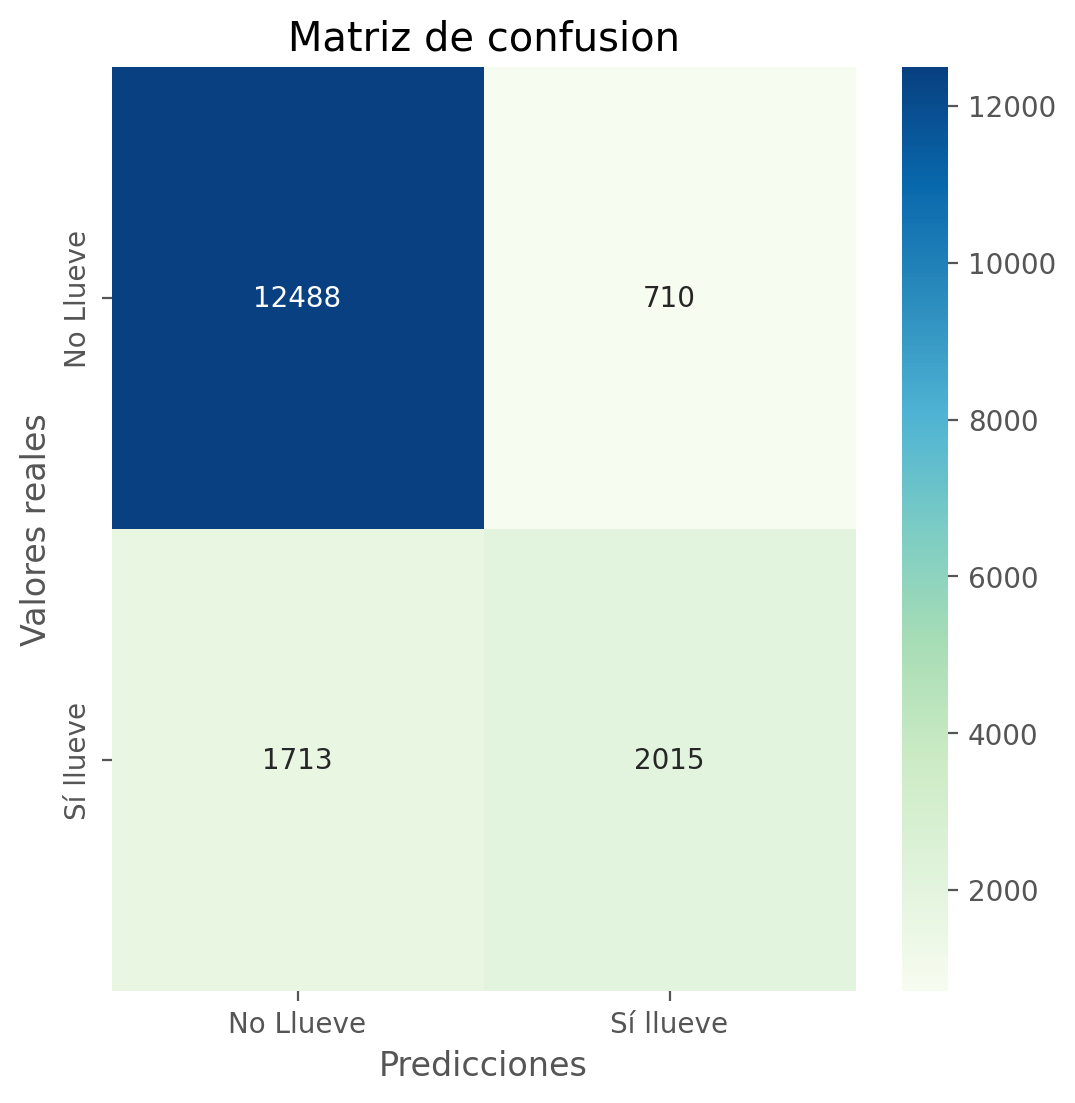

Reporte de clasificación:
              precision    recall  f1-score   support

   No Llueve       0.88      0.95      0.91     13198
   Sí llueve       0.74      0.54      0.62      3728

    accuracy                           0.86     16926
   macro avg       0.81      0.74      0.77     16926
weighted avg       0.85      0.86      0.85     16926



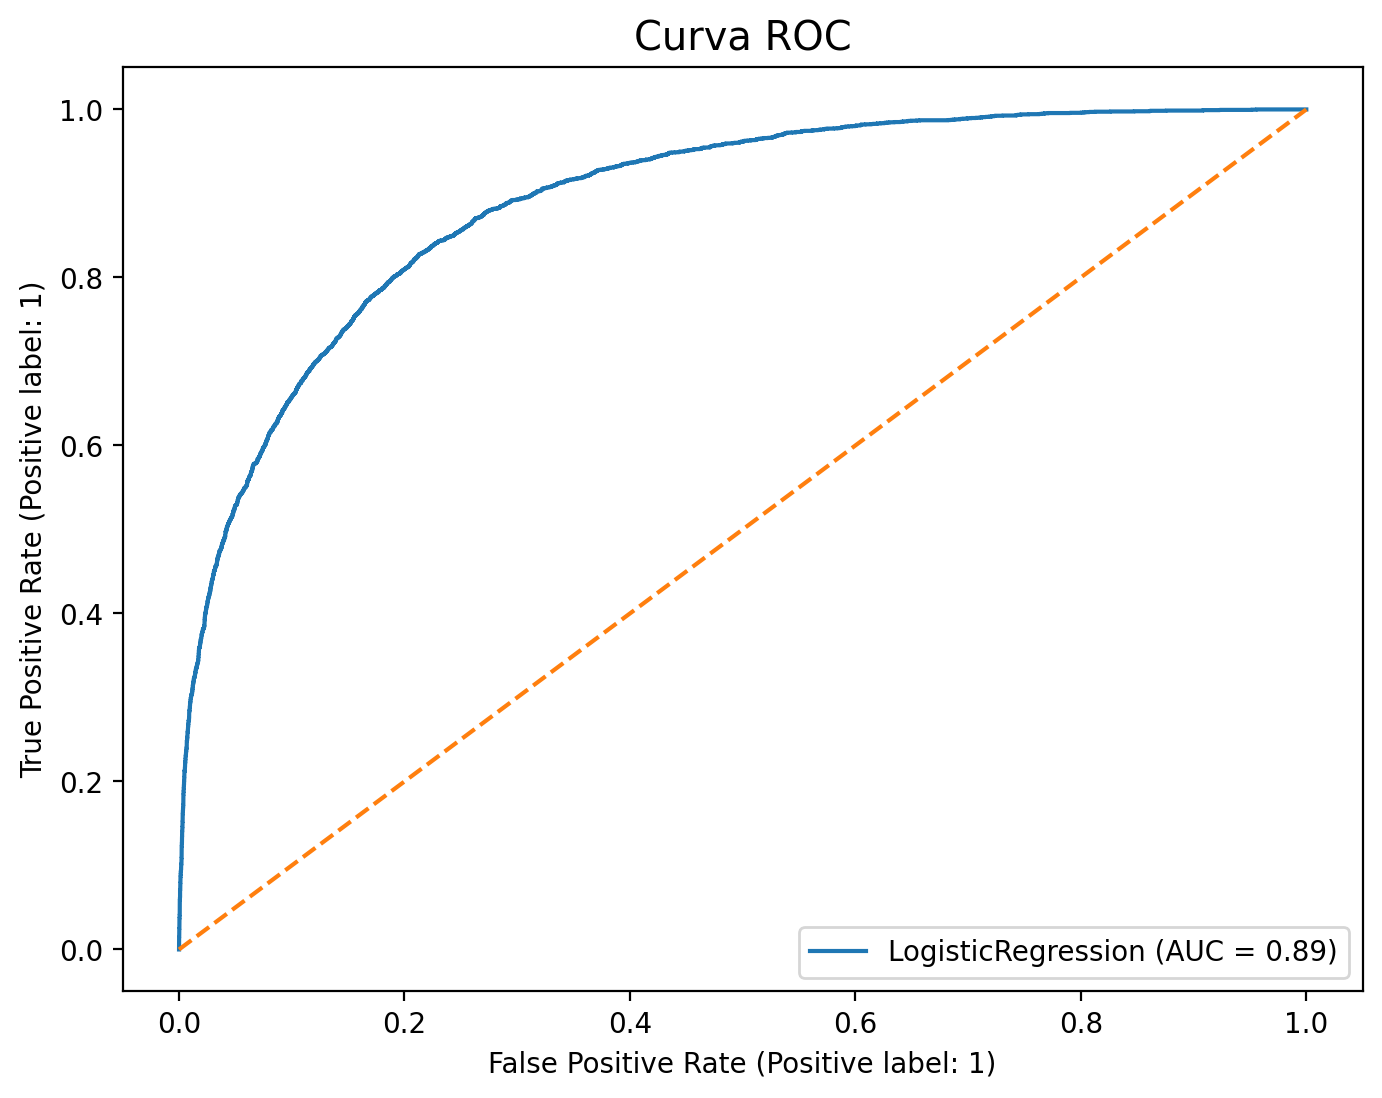

In [21]:
from sklearn.linear_model import LogisticRegression
modrlog = LogisticRegression()
modrlog.fit(X_train,y_train)
y_predlog = modrlog.predict(X_test)
Resultadoslm= mostrar_resultados(y_test, y_predlog,X_test,modrlog)



In [22]:
from sklearn.metrics import roc_auc_score
y_problog = modrlog.predict_proba(X_test)[:,1]
print("Area bajo la curva: ", roc_auc_score(y_test,y_problog))

Area bajo la curva:  0.8901849073894015


## **SVM**

In [23]:
from sklearn.svm import SVC #SVC: Clasificación y SVR:Regresión
from mlxtend.plotting import plot_decision_regions

svm = SVC(random_state=2023).fit(X_train,y_train)

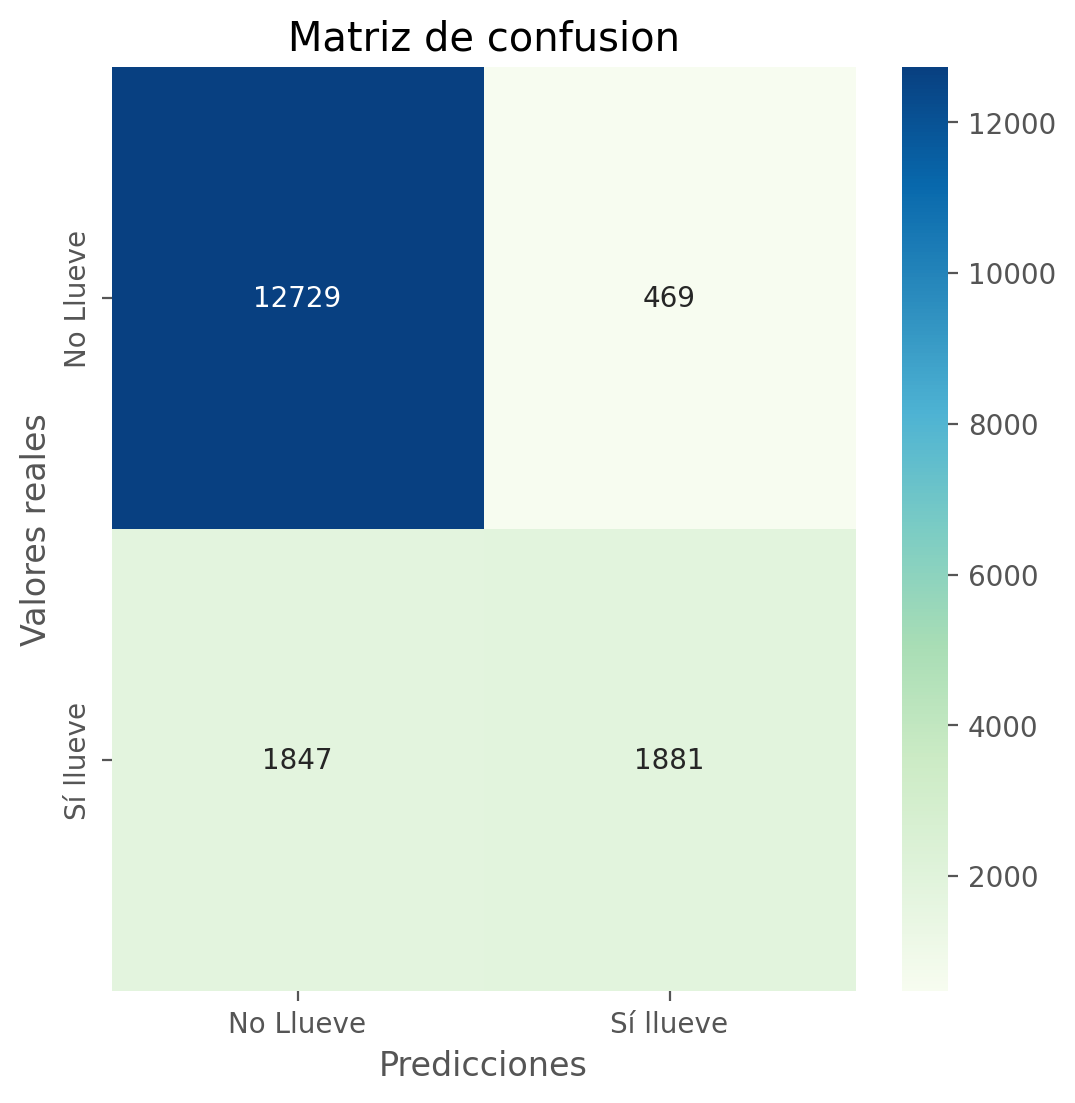

Reporte de clasificación:
              precision    recall  f1-score   support

   No Llueve       0.87      0.96      0.92     13198
   Sí llueve       0.80      0.50      0.62      3728

    accuracy                           0.86     16926
   macro avg       0.84      0.73      0.77     16926
weighted avg       0.86      0.86      0.85     16926



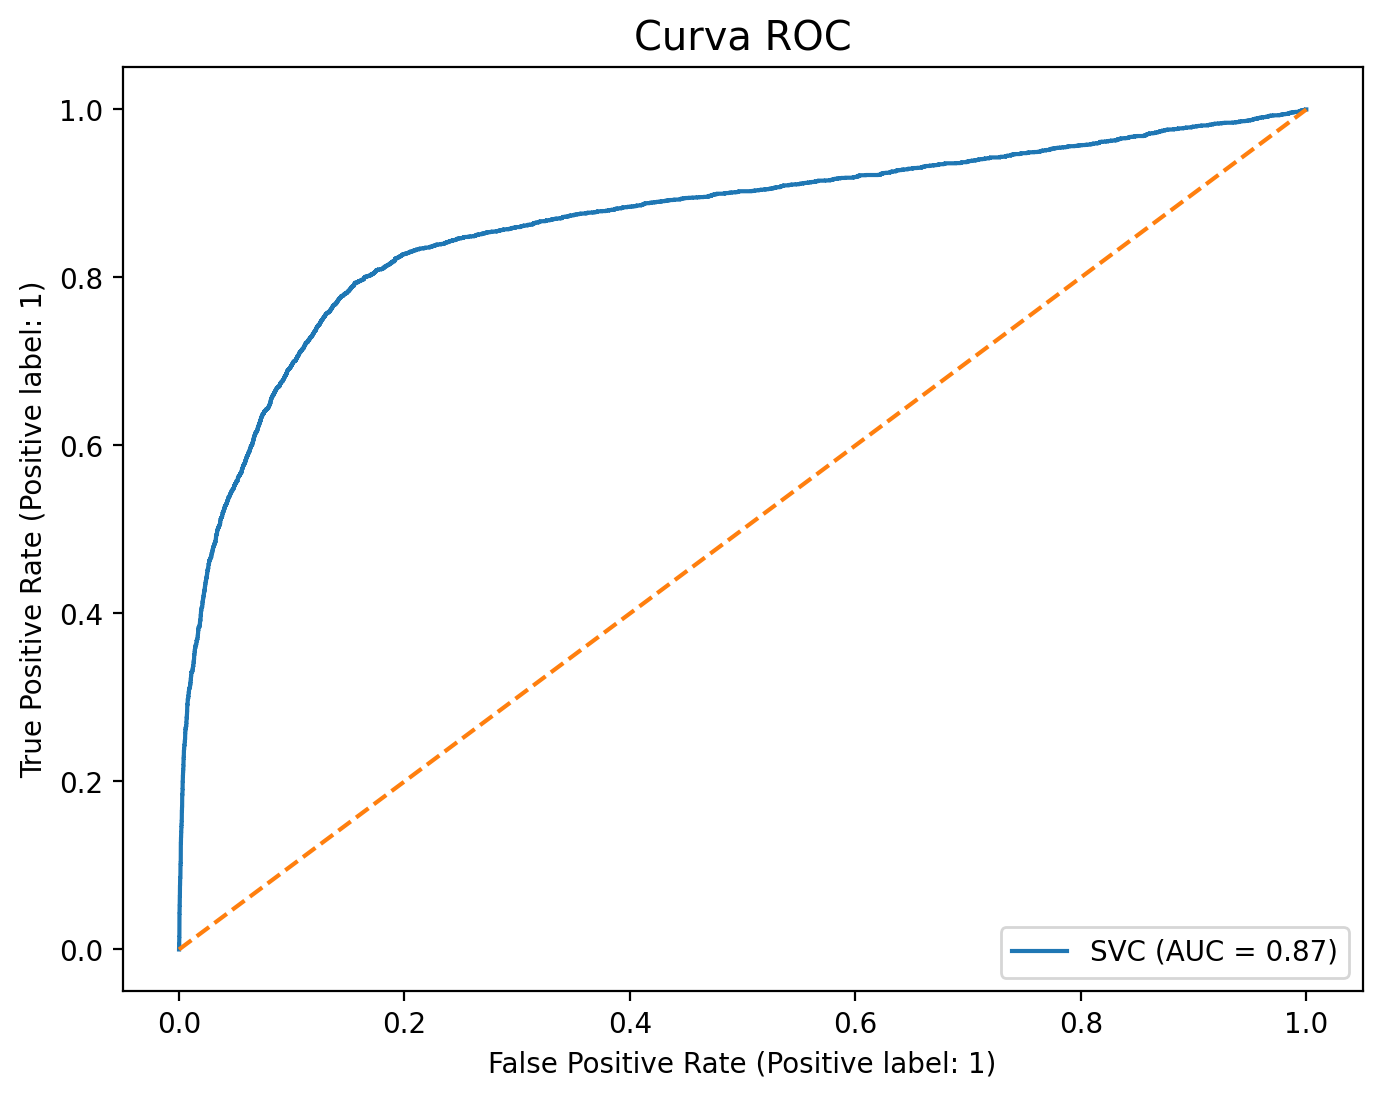

In [24]:
y_predsvm = svm.predict(X_test)
ResultadosSVM= mostrar_resultados(y_test, y_predsvm, X_test, svm)

In [25]:
#Grilla de Hiperparámetros a optimizar SVM
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np

#C= costo
hiperparametros = {"C": np.logspace(-4,1,15)}

configuraciones = KFold(n_splits = 5, shuffle=True, random_state=2023)
modelo = SVC(random_state=2023)

modelos = GridSearchCV(
    estimator = modelo, #modelo a optimizar
    param_grid= hiperparametros,# Grilla de Hiperparámetros
    cv = configuraciones, #Configuación de la validación cruzada
    scoring = 'roc_auc', #Buscamos el mejor modelo por el Área Bajo la curva (AUC) para comparar los modelos parte2 pregunta 3.
    n_jobs = -1 , #Para utilizar todos los nucleos disponibles
    verbose = 1 # Para saber cuantos modelos estamos ajustando
)
modelos.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=SVC(random_state=2023), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.27584593e-04, 5.17947468e-04, 1.17876863e-03,
       2.68269580e-03, 6.10540230e-03, 1.38949549e-02, 3.16227766e-02,
       7.19685673e-02, 1.63789371e-01, 3.72759372e-01, 8.48342898e-01,
       1.93069773e+00, 4.39397056e+00, 1.00000000e+01])},
             scoring='roc_auc', verbose=1)

In [26]:
#Para buscar el modelo óptimo considerando AUC...

print(modelos.best_params_)

{'C': 10.0}


El mejor parametro o costo optimizado en el modelo de Support Vector Machine es $C = 0.0139$ (*Redondeado*)


In [27]:
#tabla_resultados = pd.DataFrame(modelos.cv_results_)[["params", "mean_test_score", "rank_test_score"]]
#display(tabla_resultados.style.bar("mean_test_score"))

In [28]:
#Ajustamos el modelo SVM por best_estimator
svm2 = modelos.best_estimator_.fit(X_train, y_train)

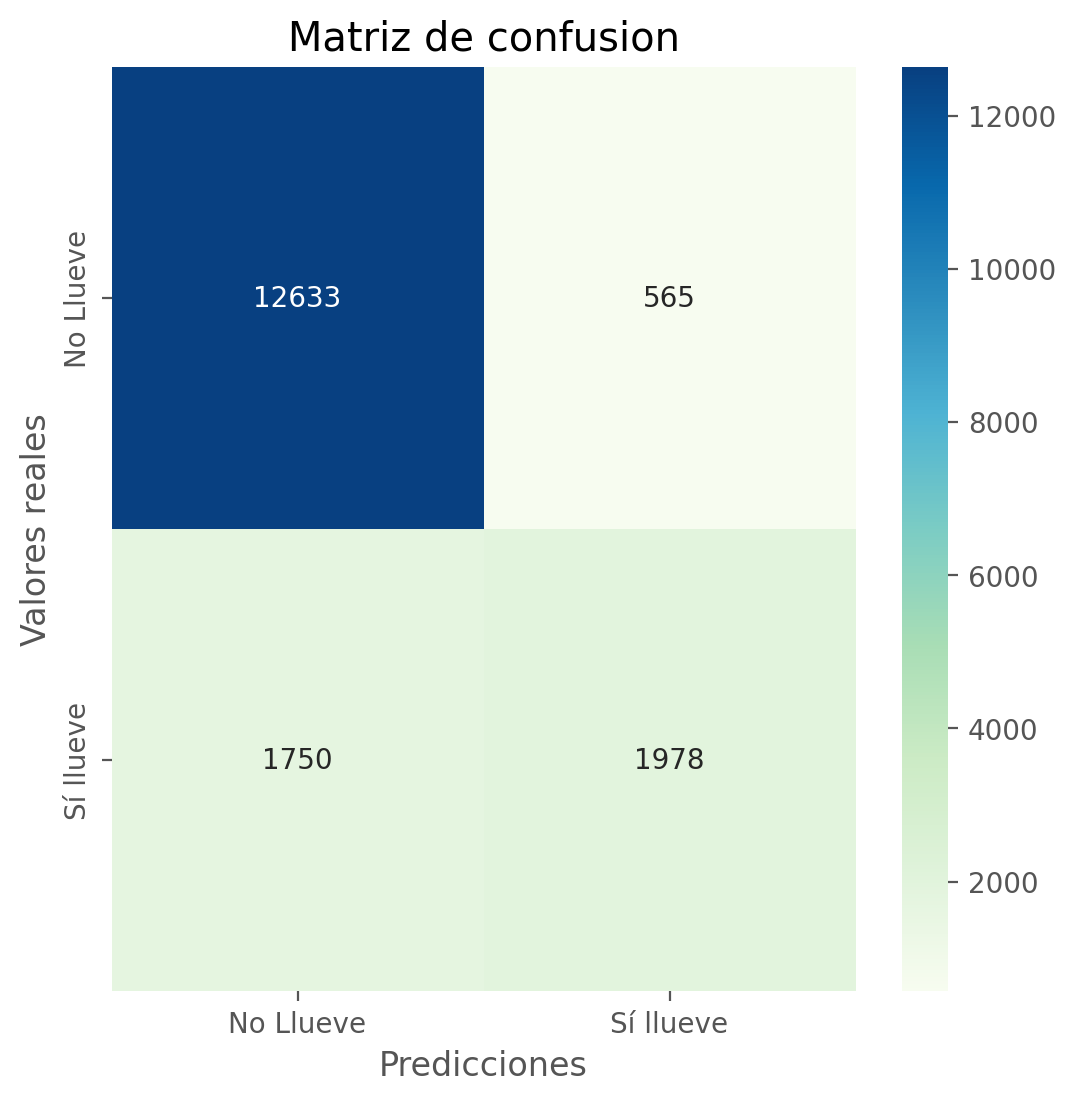

Reporte de clasificación:
              precision    recall  f1-score   support

   No Llueve       0.88      0.96      0.92     13198
   Sí llueve       0.78      0.53      0.63      3728

    accuracy                           0.86     16926
   macro avg       0.83      0.74      0.77     16926
weighted avg       0.86      0.86      0.85     16926



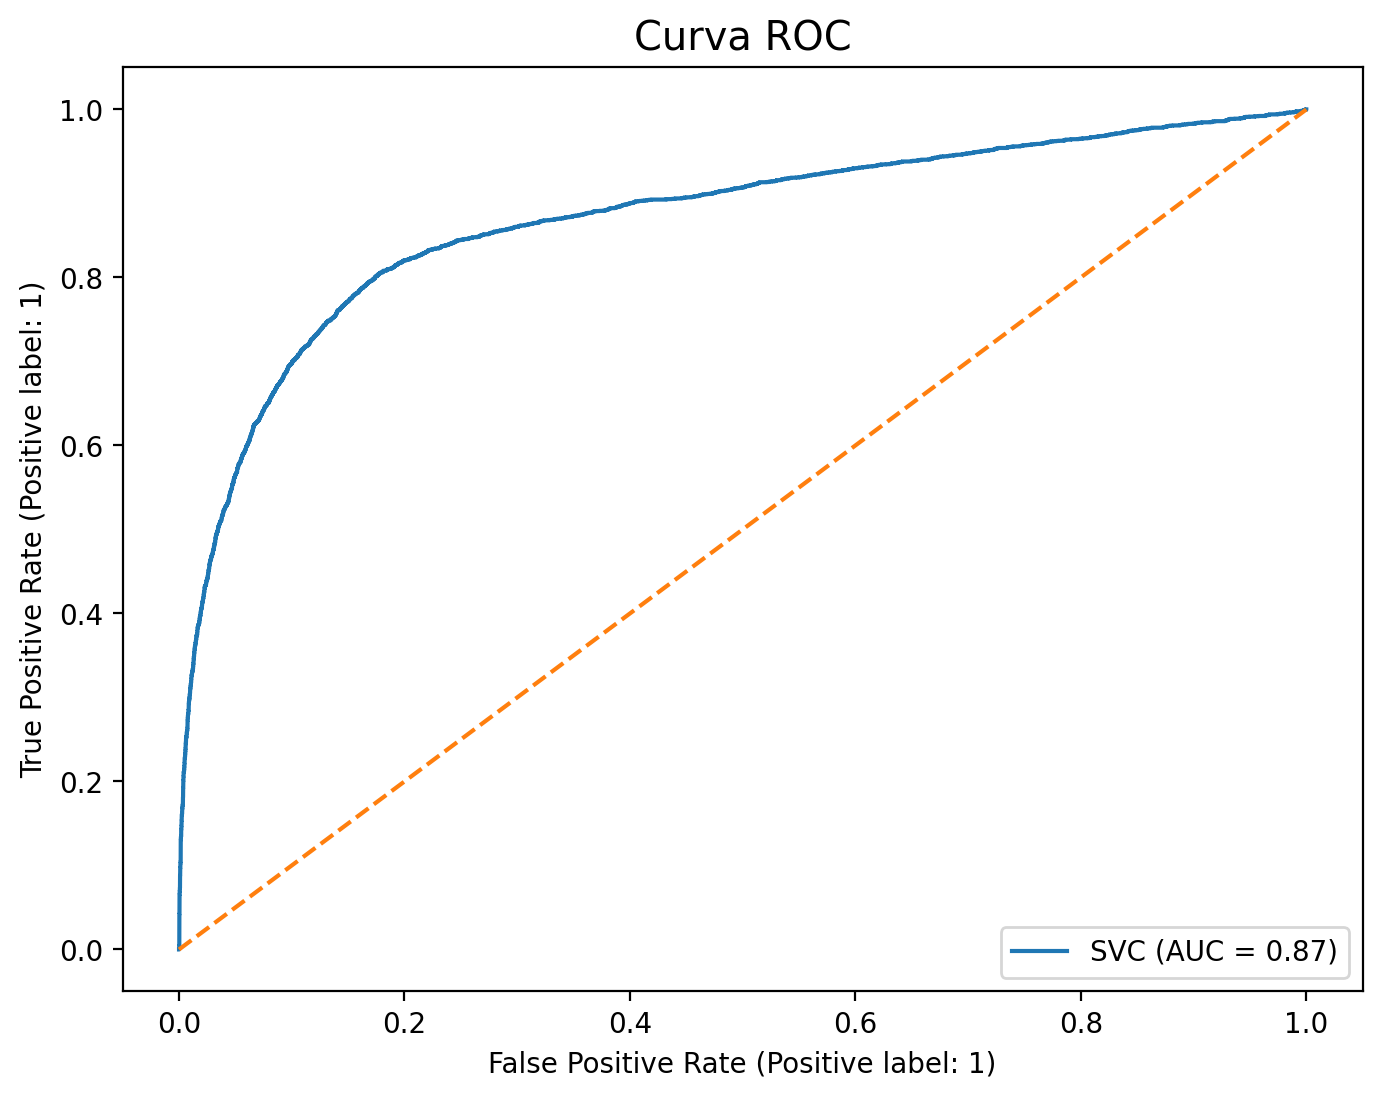

In [29]:
y_predsvm2 = svm2.predict(X_test)
ResultadosSVM2 = mostrar_resultados(y_test,y_predsvm2,X_test, svm2)

## **Árbol de clasificación**

In [30]:
from sklearn.tree import DecisionTreeClassifier

ad = DecisionTreeClassifier(random_state=2023).fit(X_train,y_train)

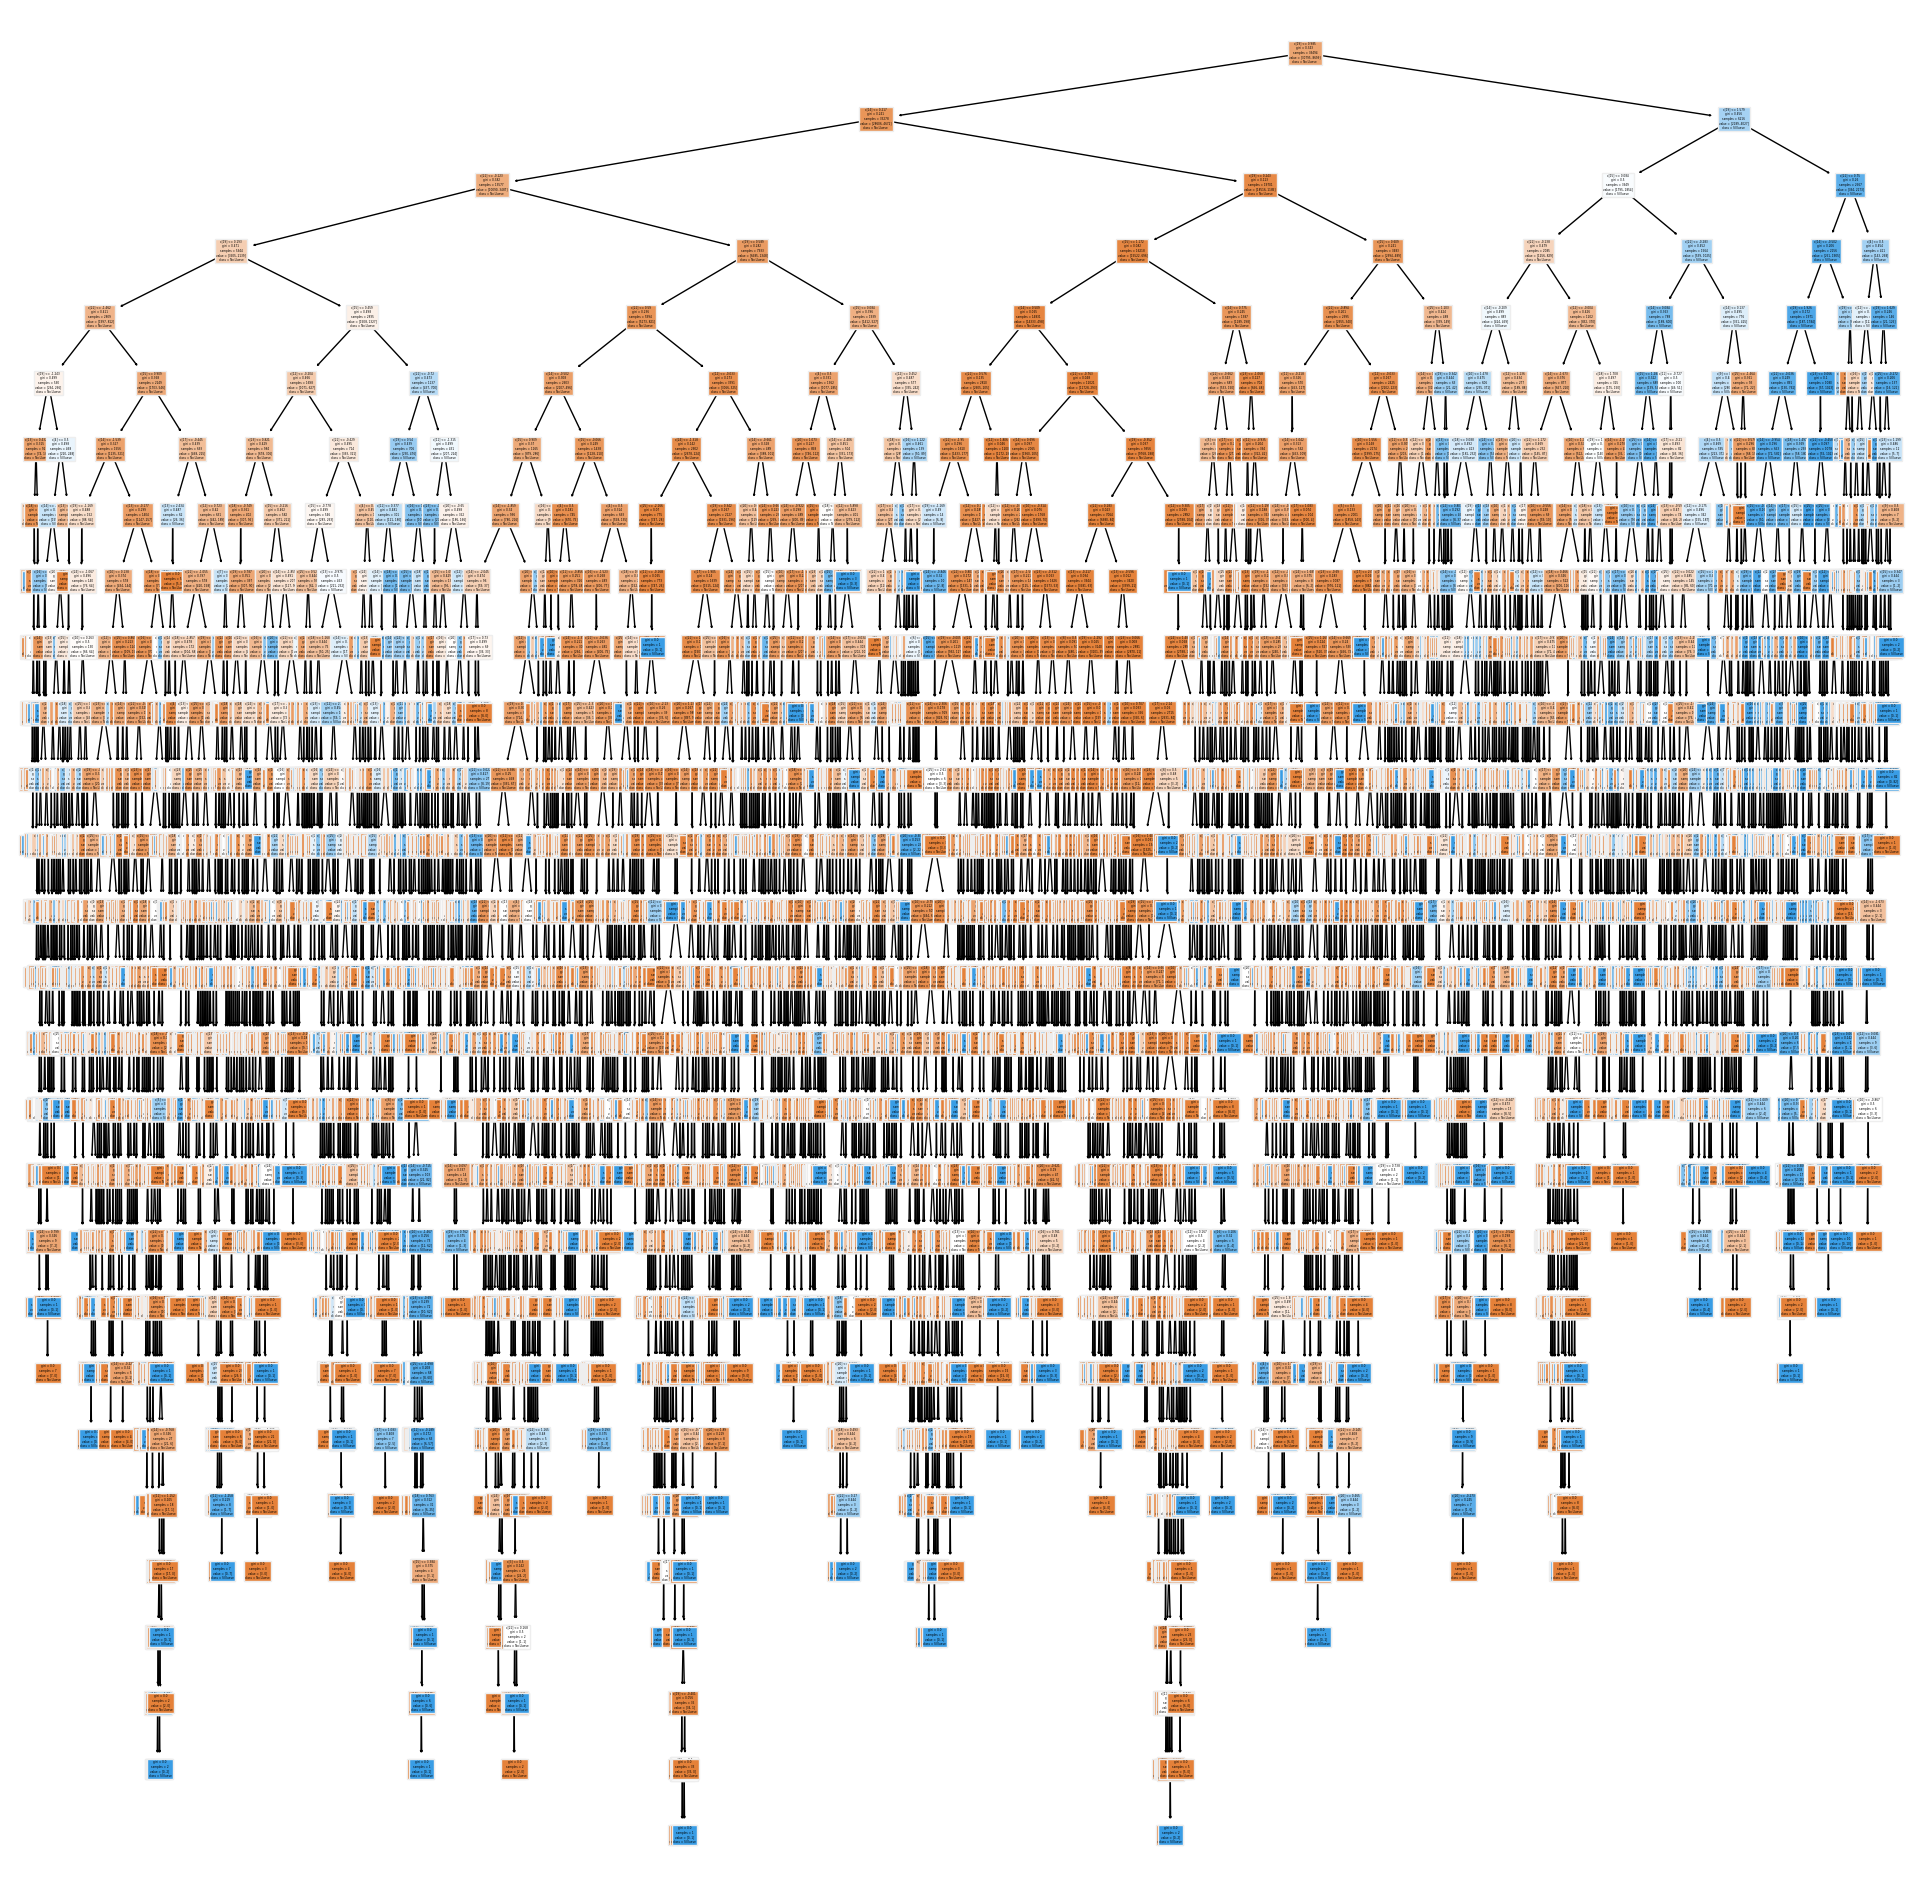

In [31]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import plot_tree
from sklearn import tree

fig, ax= plt.subplots(figsize=(12,12))
plot_tree(ad,filled=True,class_names =LABELS);

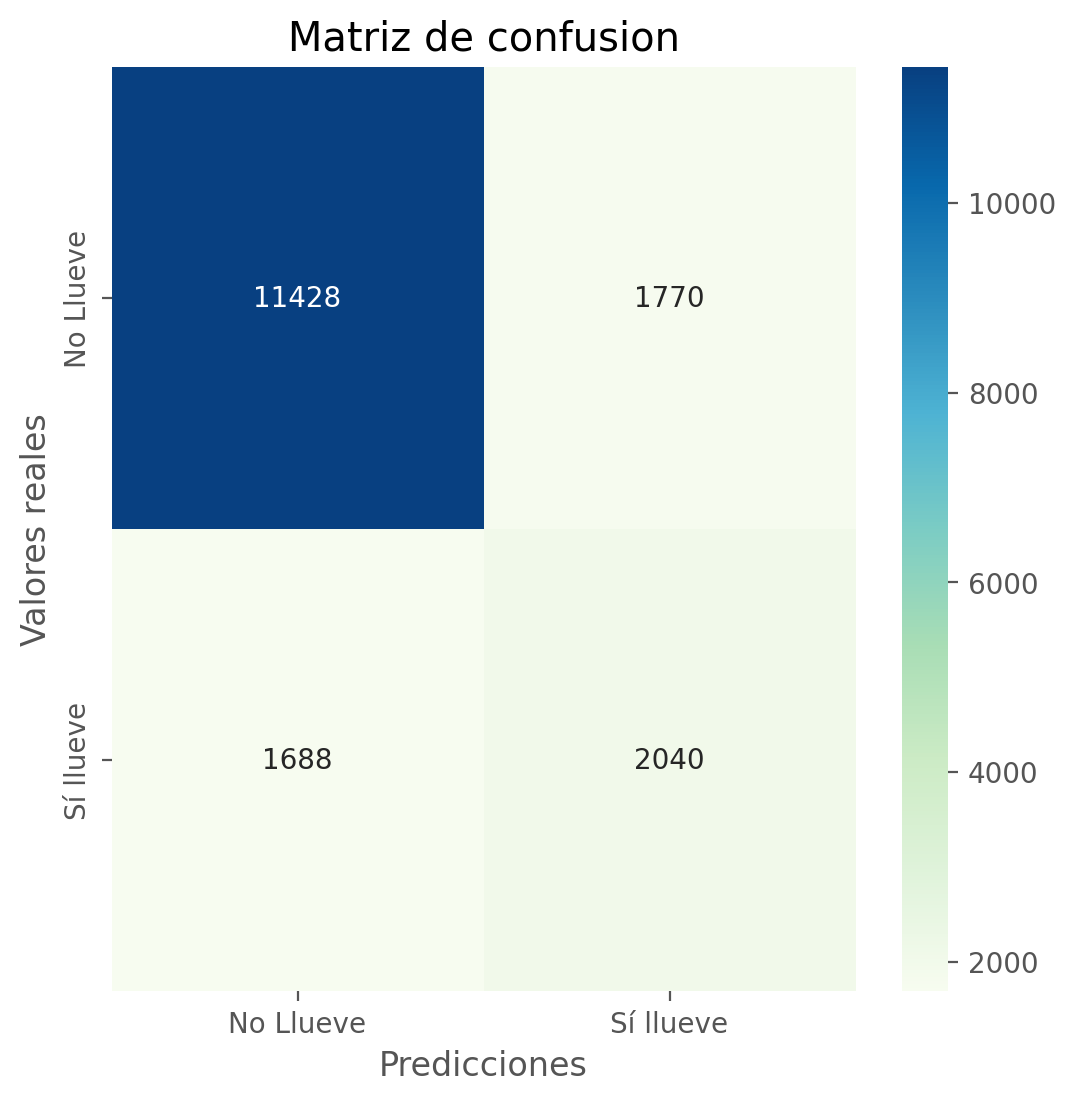

Reporte de clasificación:
              precision    recall  f1-score   support

   No Llueve       0.87      0.87      0.87     13198
   Sí llueve       0.54      0.55      0.54      3728

    accuracy                           0.80     16926
   macro avg       0.70      0.71      0.70     16926
weighted avg       0.80      0.80      0.80     16926



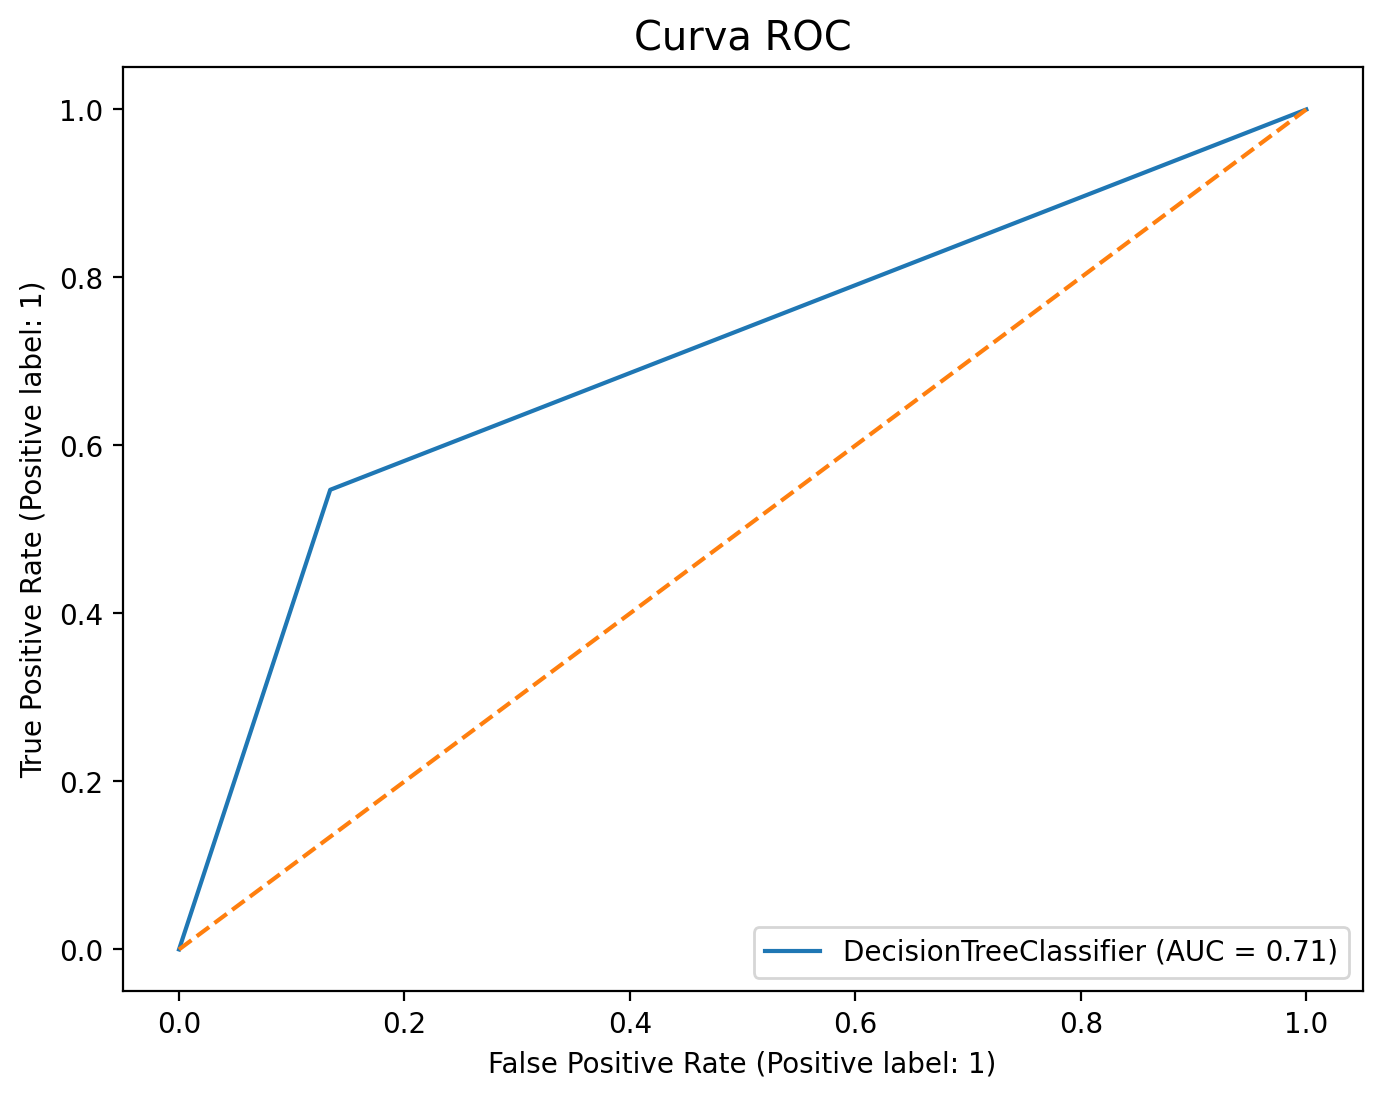

In [32]:
y_predad = ad.predict(X_test)
ResultadosAD= mostrar_resultados(y_test, y_predad,X_test,ad)

In [33]:
hiperparametros = {'max_depth': np.arange(2,10), #Profundidad del arbol - no cambio
                   'ccp_alpha': np.logspace(-9,1,15), #Costo de complejidad - no cambio
                   'min_samples_split': [2, 5, 10, 20, 50]#en la primera iteracion se uso [2,5,10,20,50] y la segunda [45,50,55] siendo 50 el mejor
                   }
configuraciones=KFold(n_splits=5,shuffle=True, random_state=2023)
modelo = DecisionTreeClassifier(random_state=2023)

modelos=GridSearchCV(
    estimator= modelo,
    param_grid =hiperparametros,
    cv = configuraciones,
    scoring= 'roc_auc',
    n_jobs=-1,
    verbose =1
)
modelos.fit(X_train,y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2023), n_jobs=-1,
             param_grid={'ccp_alpha': array([1.00000000e-09, 5.17947468e-09, 2.68269580e-08, 1.38949549e-07,
       7.19685673e-07, 3.72759372e-06, 1.93069773e-05, 1.00000000e-04,
       5.17947468e-04, 2.68269580e-03, 1.38949549e-02, 7.19685673e-02,
       3.72759372e-01, 1.93069773e+00, 1.00000000e+01]),
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 5, 10, 20, 50]},
             scoring='roc_auc', verbose=1)

In [34]:
modelos.best_params_

{'ccp_alpha': 1e-09, 'max_depth': 7, 'min_samples_split': 50}

In [35]:
ad2=modelos.best_estimator_.fit(X_train, y_train)

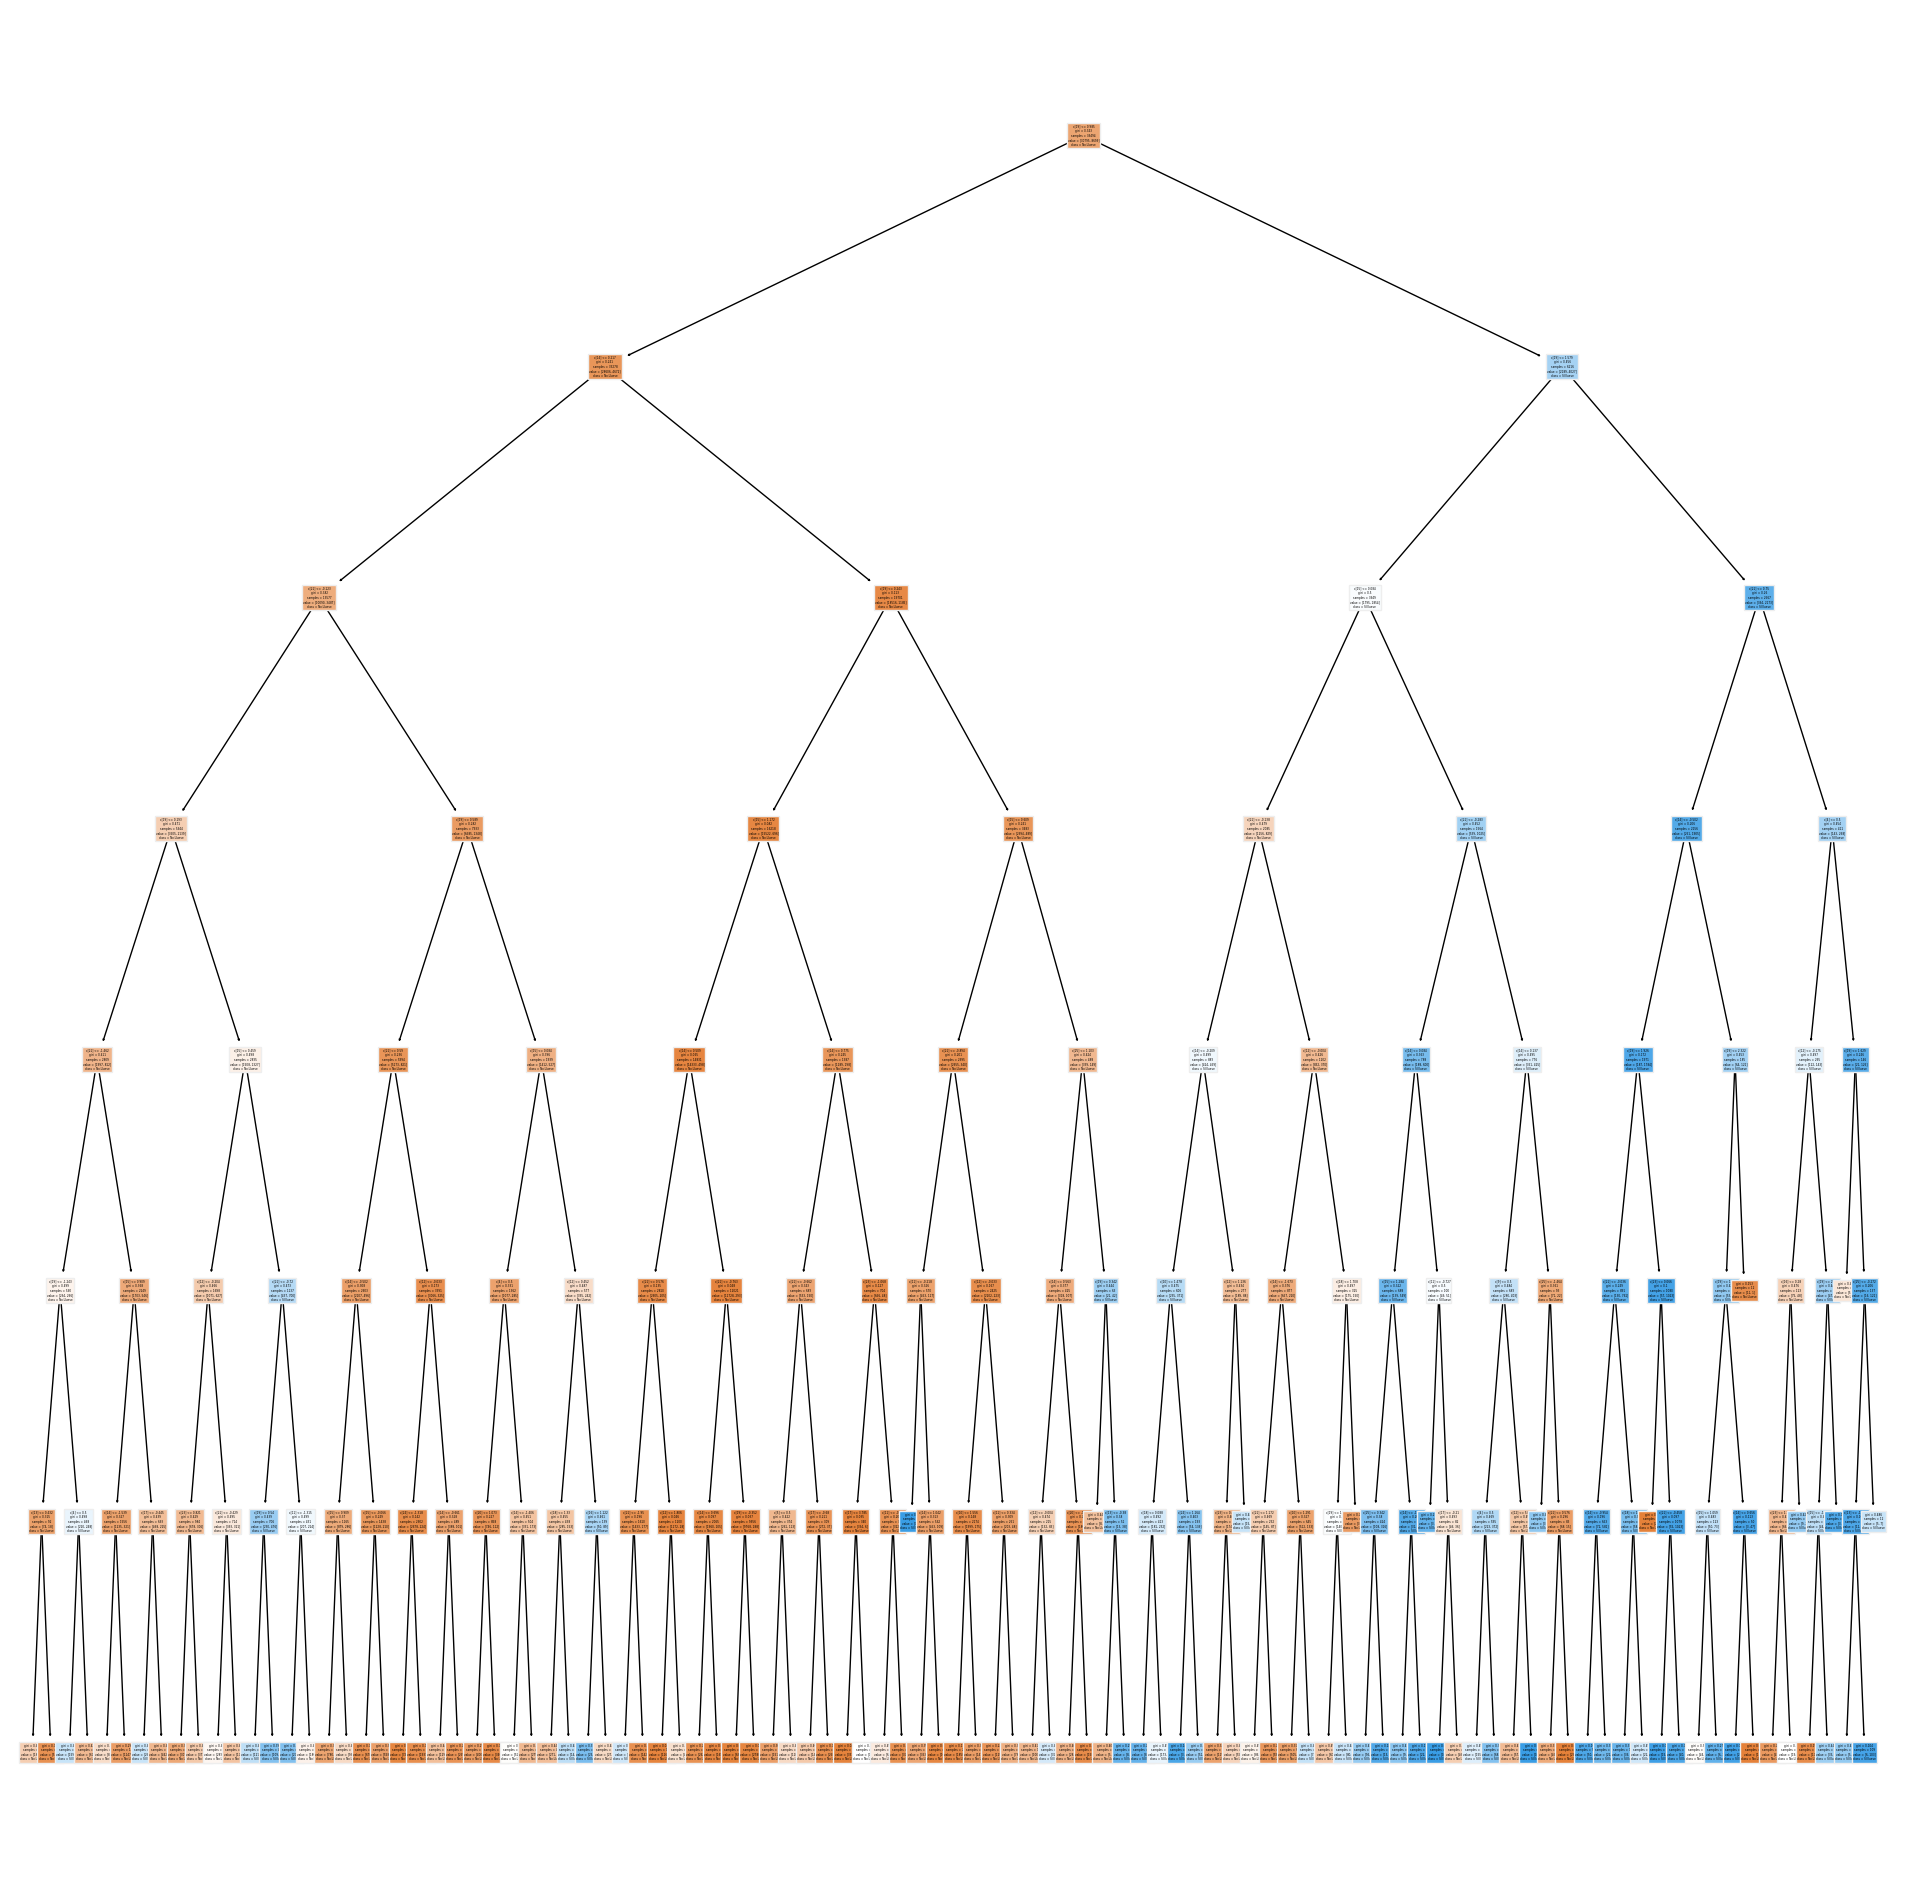

In [36]:
fig, ax= plt.subplots(figsize=(12,12))
plot_tree(ad2,filled=True,class_names =LABELS);

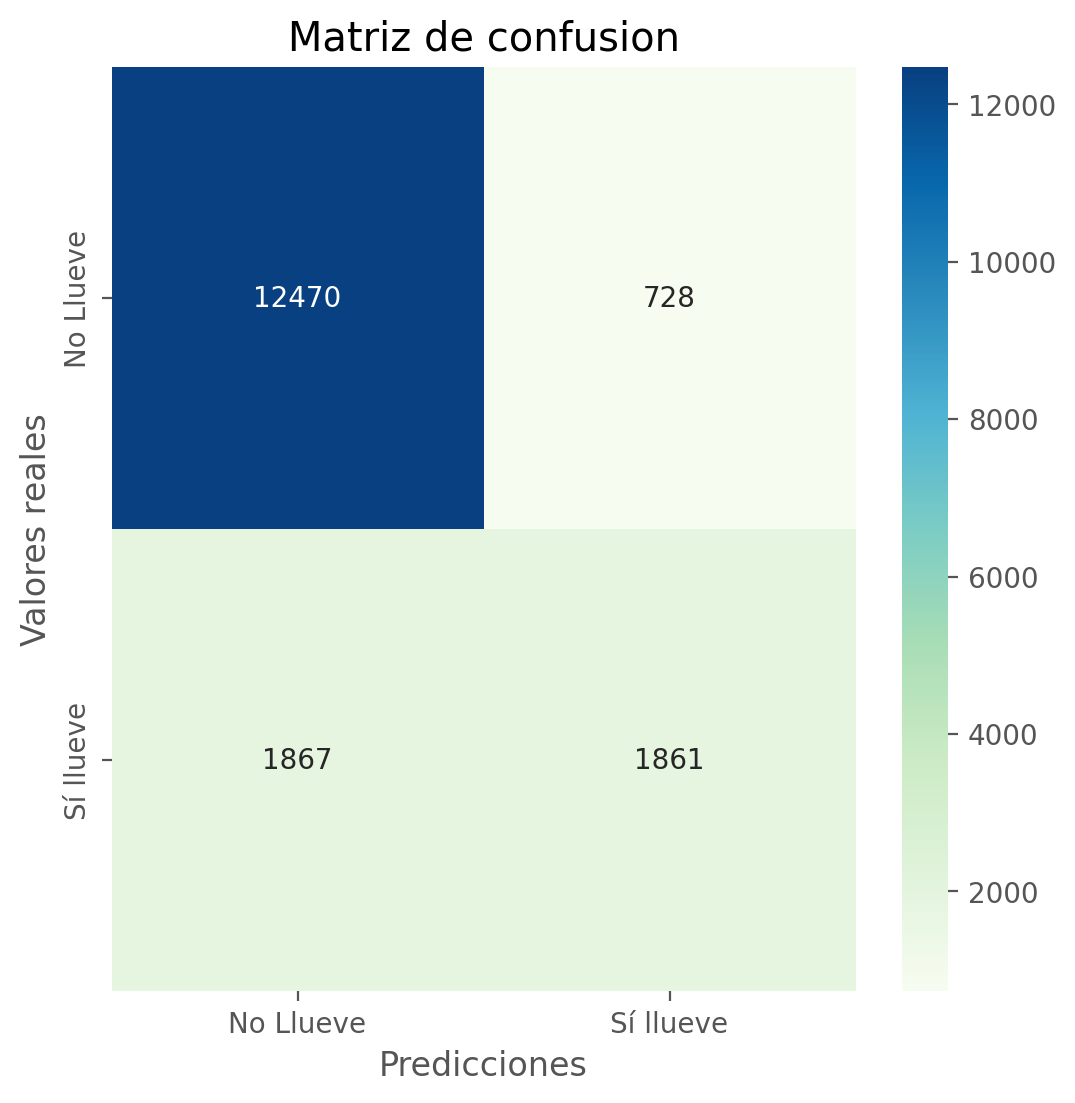

Reporte de clasificación:
              precision    recall  f1-score   support

   No Llueve       0.87      0.94      0.91     13198
   Sí llueve       0.72      0.50      0.59      3728

    accuracy                           0.85     16926
   macro avg       0.79      0.72      0.75     16926
weighted avg       0.84      0.85      0.84     16926



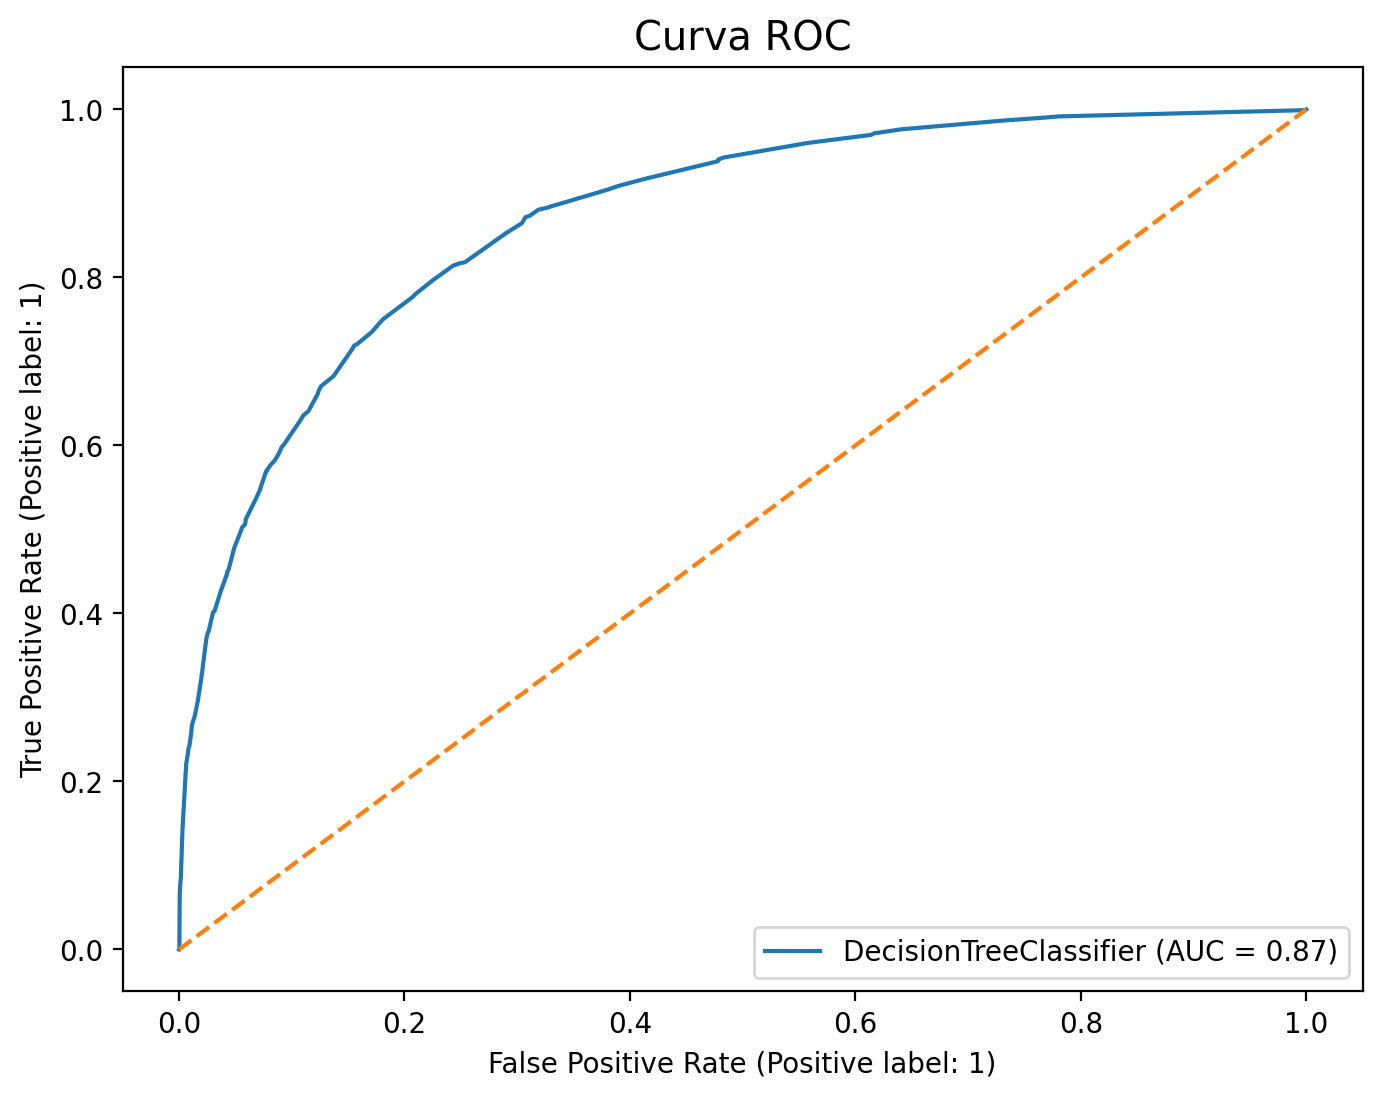

In [37]:
y_predad2=ad2.predict(X_test)
ResultadosAD2= mostrar_resultados(y_test,y_predad2,X_test,ad2)

## **Random Forest**

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=2023).fit(X_train,y_train)

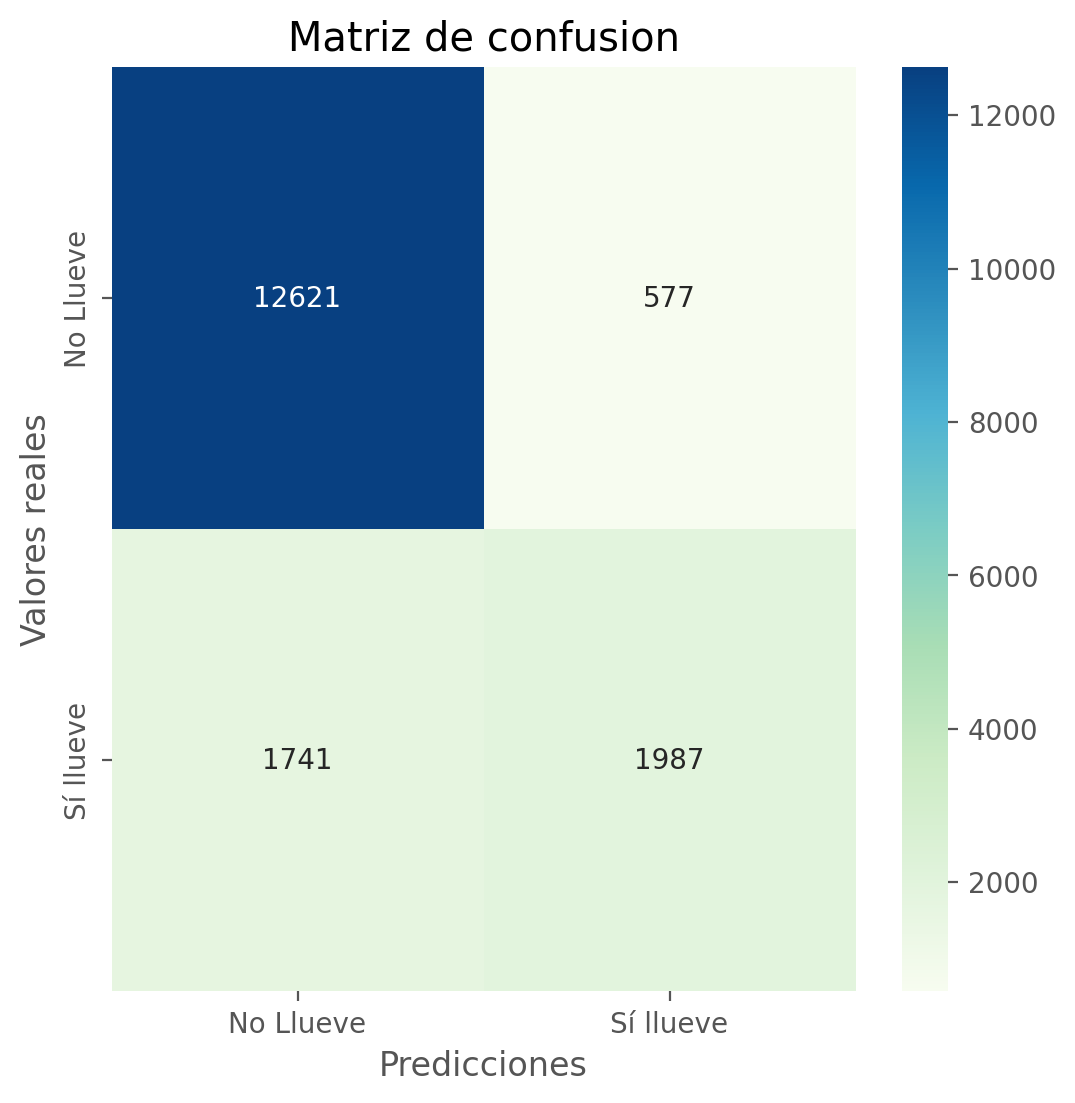

Reporte de clasificación:
              precision    recall  f1-score   support

   No Llueve       0.88      0.96      0.92     13198
   Sí llueve       0.77      0.53      0.63      3728

    accuracy                           0.86     16926
   macro avg       0.83      0.74      0.77     16926
weighted avg       0.86      0.86      0.85     16926



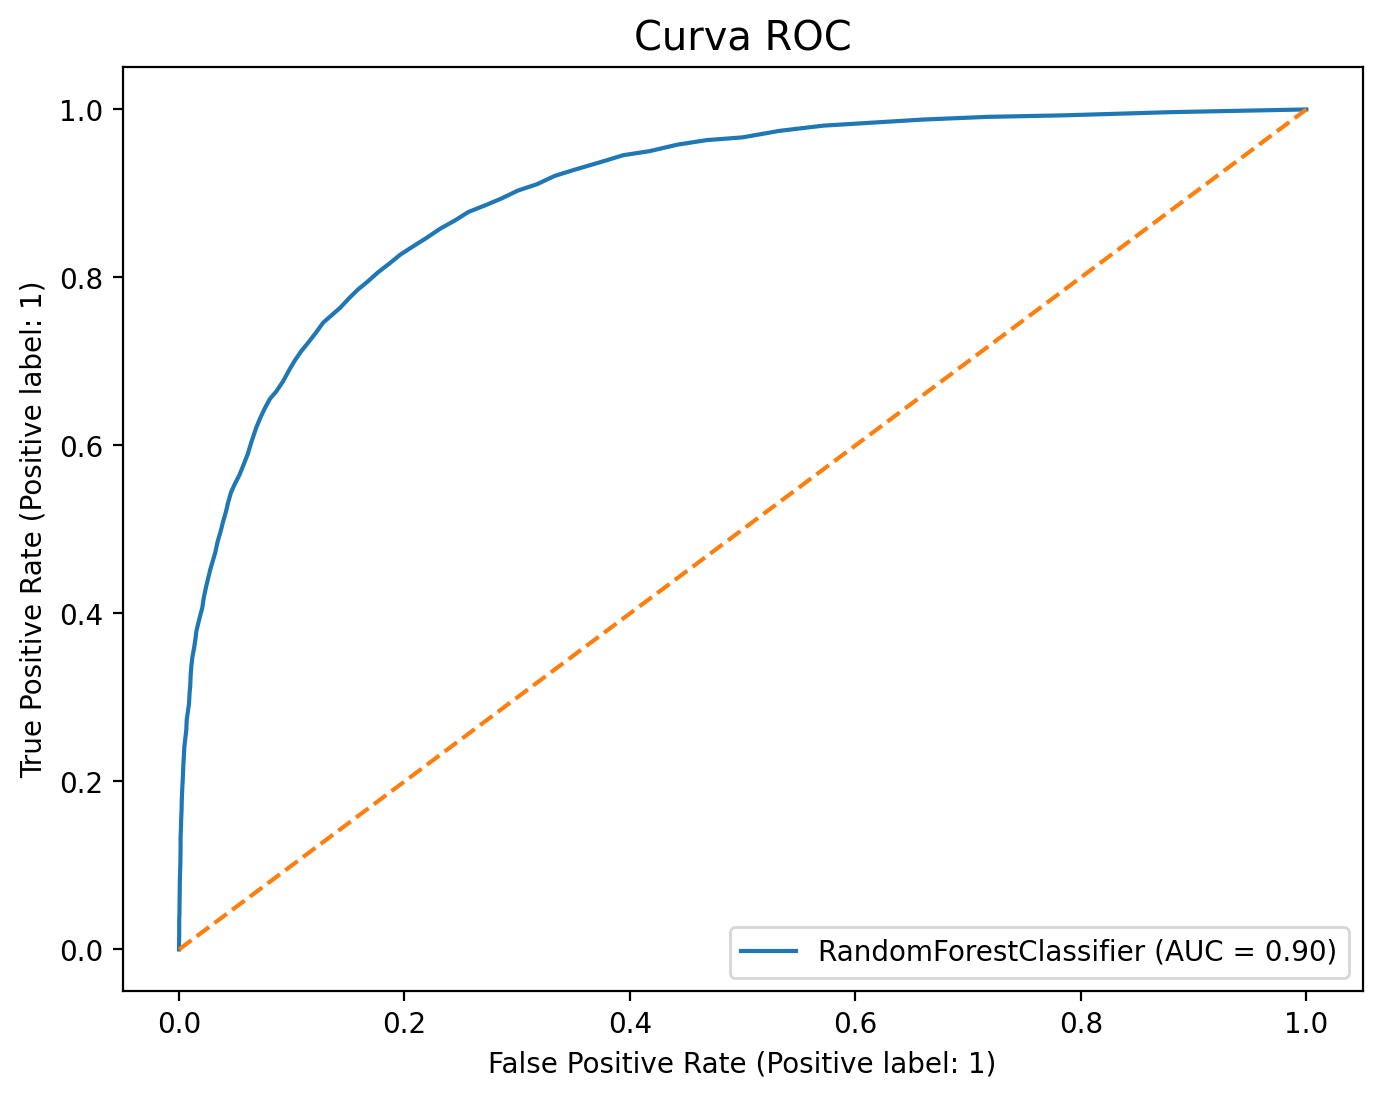

In [39]:
y_predrf = rf.predict(X_test)
ResultadosRF= mostrar_resultados(y_test,y_predrf,X_test,rf)

In [40]:
variables_imp = pd.Series(rf.feature_importances_,
                          index = X_full.columns).sort_values(ascending=False)
variables_imp

Hum3pm                0.159409
Sol                   0.110153
Pre3pm                0.068604
Pres9am               0.062777
Nub3pm                0.060358
VelRafaga             0.056094
Hum9am                0.048747
Lluvia                0.047130
Temp3pm               0.046495
MinTemp               0.046156
Temp9am               0.044655
MaxTemp               0.044207
Evaporacion           0.040607
Vel3pm                0.034907
Vel9am                0.033696
Nub9am                0.030032
LluviaHoy_Yes         0.015367
LluviaHoy_No          0.012497
Koppen_Subtropical    0.007772
Koppen_Temperate      0.006125
Estacion_Primavera    0.006111
Estacion_Otoño        0.005778
Estacion_Verano       0.004779
Estacion_Invierno     0.004428
Koppen_Grassland      0.002230
Koppen_Desert         0.000886
dtype: float64

In [41]:
hiperparametros = {'n_estimators': [50,100,200], # Número de arboles
                   'max_features': [0.1,0.3,0.5,0.7,0.9], # Número de predictores muestreados para cada arbol en proporción
                   'min_samples_split': [2,5,10,20,50,100,200] #Observaciones minimas para la división
                   }
configuraciones = KFold(n_splits=10,shuffle=True,random_state=2023)
modelo = RandomForestClassifier(random_state=2023)
modelos = GridSearchCV(
    estimator = modelo,
    param_grid= hiperparametros,
    cv= configuraciones,
    scoring= 'roc_auc',
    n_jobs= -1,
    verbose =1
)
modelos.fit(X_train,y_train)

Fitting 10 folds for each of 105 candidates, totalling 1050 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2023, shuffle=True),
             estimator=RandomForestClassifier(random_state=2023), n_jobs=-1,
             param_grid={'max_features': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'min_samples_split': [2, 5, 10, 20, 50, 100, 200],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=1)

In [42]:
modelos.best_params_

{'max_features': 0.3, 'min_samples_split': 2, 'n_estimators': 200}

In [43]:
rf2= modelos.best_estimator_.fit(X_train,y_train)

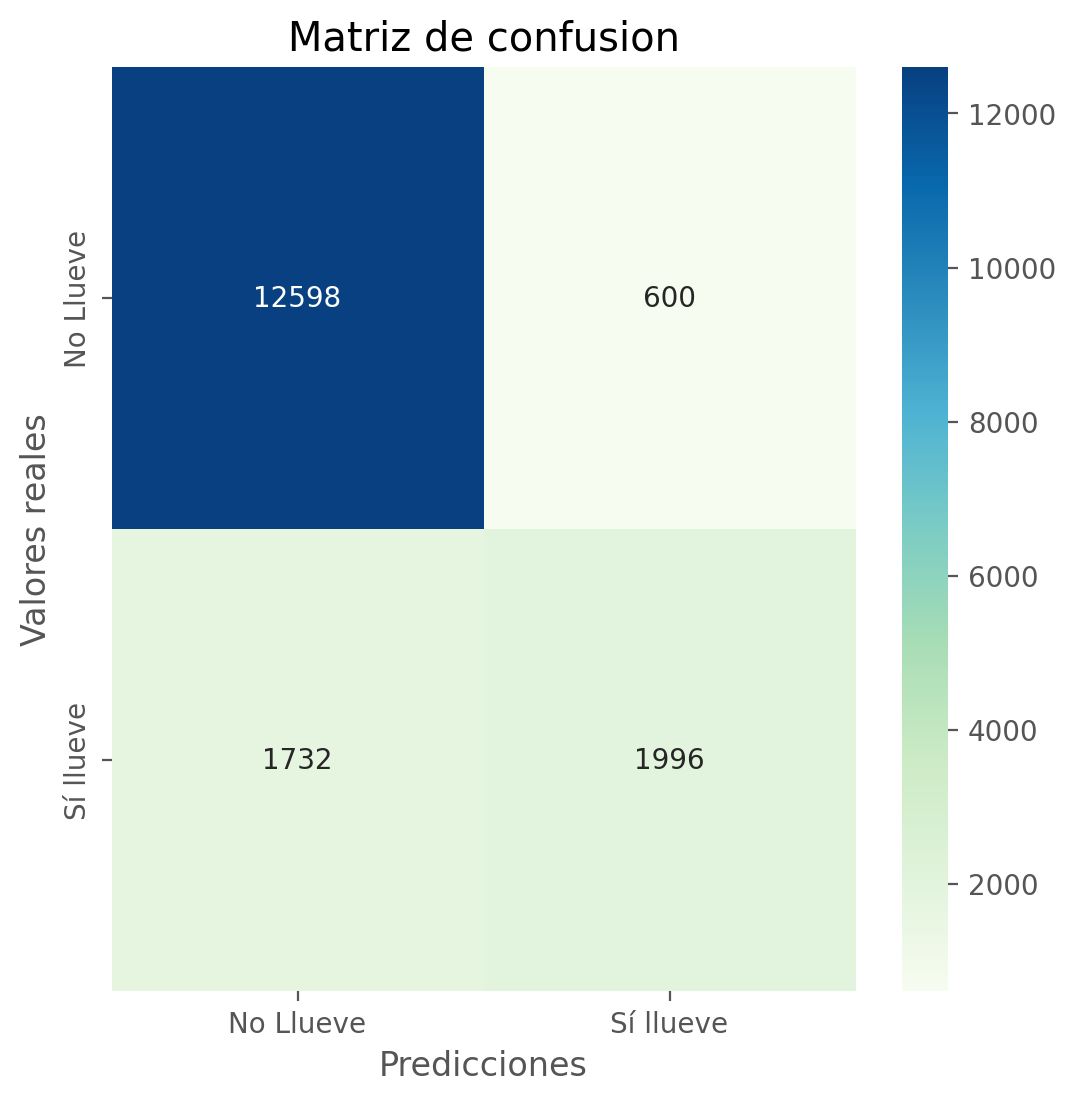

Reporte de clasificación:
              precision    recall  f1-score   support

   No Llueve       0.88      0.95      0.92     13198
   Sí llueve       0.77      0.54      0.63      3728

    accuracy                           0.86     16926
   macro avg       0.82      0.74      0.77     16926
weighted avg       0.85      0.86      0.85     16926



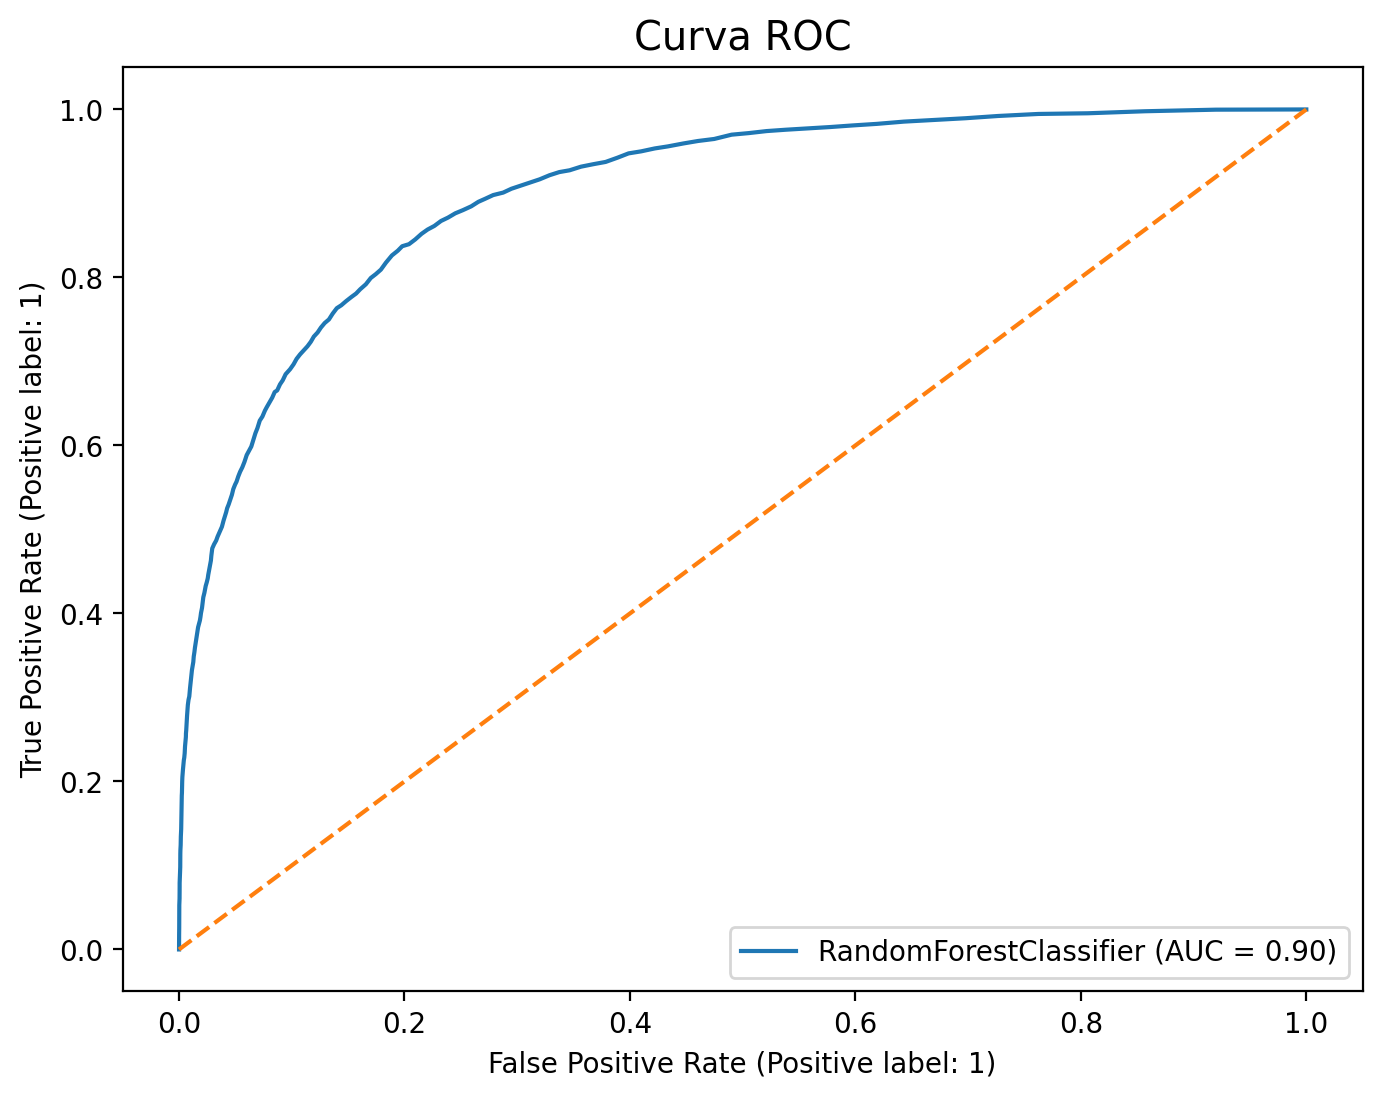

In [44]:
y_predrf2 = rf2.predict(X_test)
ResultadosRF2= mostrar_resultados(y_test,y_predrf2,X_test,rf2)

### Parte 3
Compare los modelos ajustados utilizando el set de test, bajo el criterio de f1-score, ¿cuál es el mejor modelo en su caso?

In [45]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

In [1]:
crlm= classification_report(y_test, y_predlog, modrlog)

NameError: name 'classification_report' is not defined

In [46]:
tabla_resultados = pd.DataFrame(modelos.cv_results_)[["params", "mean_test_score", "f1_score","rank_test_score"]]
display(tabla_resultados.style.bar("mean_test_score"))

KeyError: "['f1_score'] not in index"

In [ ]:
y_pred_train = svm2.predict(X_train)
y_pred_test  = svm2.predict(X_test)

print(classification_report(y_test, y_pred))


NameError: name 'svm2' is not defined

In [ ]:

classification_report(y_test,y_predad2, target_names= LABELS)

NameError: name 'classification_report' is not defined